In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df= pd.read_excel("E:\\My Courses\\mbta.xlsx",index=False)
df.head()

,MBTA Avg Weekday Unlinked Passenger Trips (thousands),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,NaN,mode,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,...,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10
1,1.0,All Modes by Qtr,NaN,NaN,1187.65,NaN,NaN,1245.96,NaN,NaN,...,NaN,NaN,1223.45,NaN,NaN,1302.41,NaN,NaN,1290.55,NaN
2,2.0,Boat,4,3.6,40,4.3,4.9,5.8,6.521,6.572,...,3.14,3.284,3.674,4.251,4.431,5.474,6.581,6.733,5.003,4.484
3,3.0,Bus,335.819,338.675,339.867,352.162,354.367,350.543,357.519,355.479,...,334.958,346.234,380.399,380.446,385.289,376.317,361.585,353.793,388.271,398.456
4,4.0,Commuter Rail,142.2,138.5,137.7,139.5,139,143,142.391,142.364,...,128.396,125.463,134.374,134.169,136.14,135.581,132.41,130.616,136.901,128.72


In [3]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
df.head()

,nan,mode,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,...,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10
1,1.0,All Modes by Qtr,NaN,NaN,1187.65,NaN,NaN,1245.96,NaN,NaN,...,NaN,NaN,1223.45,NaN,NaN,1302.41,NaN,NaN,1290.55,NaN
2,2.0,Boat,4,3.6,40,4.3,4.9,5.8,6.521,6.572,...,3.14,3.284,3.674,4.251,4.431,5.474,6.581,6.733,5.003,4.484
3,3.0,Bus,335.819,338.675,339.867,352.162,354.367,350.543,357.519,355.479,...,334.958,346.234,380.399,380.446,385.289,376.317,361.585,353.793,388.271,398.456
4,4.0,Commuter Rail,142.2,138.5,137.7,139.5,139,143,142.391,142.364,...,128.396,125.463,134.374,134.169,136.14,135.581,132.41,130.616,136.901,128.72
5,5.0,Heavy Rail,435.294,448.271,458.583,472.201,474.579,477.032,471.735,461.605,...,468.418,504.068,516.73,528.631,528.122,529.528,532.888,508.145,550.137,554.932


In [4]:
#drop the first column
df=df.iloc[:,1:]
df.head()

,mode,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,...,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10
1,All Modes by Qtr,NaN,NaN,1187.65,NaN,NaN,1245.96,NaN,NaN,1256.57,...,NaN,NaN,1223.45,NaN,NaN,1302.41,NaN,NaN,1290.55,NaN
2,Boat,4,3.6,40,4.3,4.9,5.8,6.521,6.572,5.469,...,3.14,3.284,3.674,4.251,4.431,5.474,6.581,6.733,5.003,4.484
3,Bus,335.819,338.675,339.867,352.162,354.367,350.543,357.519,355.479,372.598,...,334.958,346.234,380.399,380.446,385.289,376.317,361.585,353.793,388.271,398.456
4,Commuter Rail,142.2,138.5,137.7,139.5,139,143,142.391,142.364,143.051,...,128.396,125.463,134.374,134.169,136.14,135.581,132.41,130.616,136.901,128.72
5,Heavy Rail,435.294,448.271,458.583,472.201,474.579,477.032,471.735,461.605,499.566,...,468.418,504.068,516.73,528.631,528.122,529.528,532.888,508.145,550.137,554.932


In [5]:
df1=pd.melt(frame=df,id_vars='mode',var_name='years')
df1.head()


,mode,years,value
0,All Modes by Qtr,2007-01,NaN
1,Boat,2007-01,4
2,Bus,2007-01,335.819
3,Commuter Rail,2007-01,142.2
4,Heavy Rail,2007-01,435.294


In [6]:
df2=df1.pivot(index='years',columns='mode',values='value')
df2=df2.reset_index()
df2.head(12)

mode,years,All Modes by Qtr,Boat,Bus,Commuter Rail,Heavy Rail,Light Rail,Pct Chg / Yr,Private Bus,RIDE,TOTAL,Trackless Trolley
0,2007-01,NaN,4,335.819,142.2,435.294,227.231,0.02,4.772,4.9,1166.97,12.757
1,2007-02,NaN,3.6,338.675,138.5,448.271,240.262,-0.04,4.417,5,1191.64,12.913
2,2007-03,1187.65,40,339.867,137.7,458.583,241.444,0.114,4.574,5.5,1204.72,13.057
3,2007-04,NaN,4.3,352.162,139.5,472.201,255.557,-0.002,4.542,5.4,1247.11,13.444
4,2007-05,NaN,4.9,354.367,139,474.579,248.262,0.049,4.768,5.4,1244.76,13.479
5,2007-06,1245.96,5.8,350.543,143,477.032,246.108,0.096,4.722,5.6,1246.13,13.323
6,2007-07,NaN,6.521,357.519,142.391,471.735,243.286,-0.037,3.936,5.253,1243.95,13.311
7,2007-08,NaN,6.572,355.479,142.364,461.605,234.907,0.004,3.946,5.308,1223.32,13.142
8,2007-09,1256.57,5.469,372.598,143.051,499.566,265.748,-0.007,4.329,5.609,1310.76,14.393
9,2007-10,NaN,5.145,368.847,146.542,457.741,241.434,-0.064,4.315,5.806,1244.45,14.622


In [7]:
df2.isnull().sum()

mode
years                 0
All Modes by Qtr     39
Boat                  0
Bus                   0
Commuter Rail         0
Heavy Rail            0
Light Rail            0
Pct Chg / Yr          0
Private Bus           0
RIDE                  0
TOTAL                 0
Trackless Trolley     0
dtype: int64

In [8]:
#filling the missing values by the next value ('bfill') because this column represent the qtr of the year.
df2.fillna(method='bfill',inplace=True)
df2.head(12)


mode,years,All Modes by Qtr,Boat,Bus,Commuter Rail,Heavy Rail,Light Rail,Pct Chg / Yr,Private Bus,RIDE,TOTAL,Trackless Trolley
0,2007-01,1187.653,4.000,335.819,142.200,435.294,227.231,0.020,4.772,4.900,1166.974,12.757
1,2007-02,1187.653,3.600,338.675,138.500,448.271,240.262,-0.040,4.417,5.000,1191.639,12.913
2,2007-03,1187.653,40.000,339.867,137.700,458.583,241.444,0.114,4.574,5.500,1204.725,13.057
3,2007-04,1245.959,4.300,352.162,139.500,472.201,255.557,-0.002,4.542,5.400,1247.105,13.444
4,2007-05,1245.959,4.900,354.367,139.000,474.579,248.262,0.049,4.768,5.400,1244.755,13.479
5,2007-06,1245.959,5.800,350.543,143.000,477.032,246.108,0.096,4.722,5.600,1246.129,13.323
6,2007-07,1256.571,6.521,357.519,142.391,471.735,243.286,-0.037,3.936,5.253,1243.952,13.311
7,2007-08,1256.571,6.572,355.479,142.364,461.605,234.907,0.004,3.946,5.308,1223.323,13.142
8,2007-09,1256.571,5.469,372.598,143.051,499.566,265.748,-0.007,4.329,5.609,1310.764,14.393
9,2007-10,1216.890,5.145,368.847,146.542,457.741,241.434,-0.064,4.315,5.806,1244.453,14.622


In [9]:
df2.isnull().sum()

mode
years                0
All Modes by Qtr     1
Boat                 0
Bus                  0
Commuter Rail        0
Heavy Rail           0
Light Rail           0
Pct Chg / Yr         0
Private Bus          0
RIDE                 0
TOTAL                0
Trackless Trolley    0
dtype: int64

In [10]:
df2.tail()

mode,years,All Modes by Qtr,Boat,Bus,Commuter Rail,Heavy Rail,Light Rail,Pct Chg / Yr,Private Bus,RIDE,TOTAL,Trackless Trolley
53,2011-06,1302.414,5.474,376.317,135.581,529.528,221.865,0.054,2.815,8.377,1292.085,12.128
54,2011-07,1290.549,6.581,361.585,132.410,532.888,231.010,0.067,2.671,7.902,1286.107,11.060
55,2011-08,1290.549,6.733,353.793,130.616,508.145,220.164,0.052,2.655,8.071,1241.268,11.091
56,2011-09,1290.549,5.003,388.271,136.901,550.137,244.949,0.043,2.843,8.318,1348.754,12.332
57,2011-10,NaN,4.484,398.456,128.720,554.932,237.768,0.032,2.967,8.598,1348.222,12.297


In [11]:
df2=df2.drop(df2.index[-1])
df2.shape

(57, 12)

In [12]:
df2.tail()

mode,years,All Modes by Qtr,Boat,Bus,Commuter Rail,Heavy Rail,Light Rail,Pct Chg / Yr,Private Bus,RIDE,TOTAL,Trackless Trolley
52,2011-05,1302.414,4.431,385.289,136.140,528.122,225.776,0.050,2.776,8.059,1302.884,12.291
53,2011-06,1302.414,5.474,376.317,135.581,529.528,221.865,0.054,2.815,8.377,1292.085,12.128
54,2011-07,1290.549,6.581,361.585,132.410,532.888,231.010,0.067,2.671,7.902,1286.107,11.060
55,2011-08,1290.549,6.733,353.793,130.616,508.145,220.164,0.052,2.655,8.071,1241.268,11.091
56,2011-09,1290.549,5.003,388.271,136.901,550.137,244.949,0.043,2.843,8.318,1348.754,12.332


In [13]:
#treat with outliers
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
((df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))).sum()


mode
All Modes by Qtr     0
Boat                 1
Bus                  0
Commuter Rail        0
Heavy Rail           0
Light Rail           0
Pct Chg / Yr         0
Private Bus          0
RIDE                 0
TOTAL                0
Trackless Trolley    6
years                0
dtype: int64

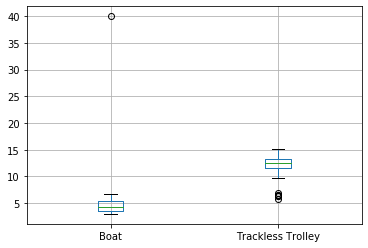

In [14]:
df2.boxplot(column=['Boat','Trackless Trolley'])
plt.show()

In [15]:
new_df=df2[['Boat','Trackless Trolley']]
Q1 = new_df.quantile(0.25)
Q3 = new_df.quantile(0.75)
IQR = Q3-Q1
minimum = Q1 - 1.5*IQR
maximum = Q3 + 1.5*IQR
condition = (new_df <= maximum) & (new_df >= minimum)
condition = condition.all(axis=1)
df2=df2[condition]

In [16]:
#finally our data is clean 
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 56
Data columns (total 12 columns):
years                50 non-null object
All Modes by Qtr     50 non-null float64
Boat                 50 non-null float64
Bus                  50 non-null float64
Commuter Rail        50 non-null float64
Heavy Rail           50 non-null float64
Light Rail           50 non-null float64
Pct Chg / Yr         50 non-null float64
Private Bus          50 non-null float64
RIDE                 50 non-null float64
TOTAL                50 non-null float64
Trackless Trolley    50 non-null float64
dtypes: float64(11), object(1)
memory usage: 5.1+ KB
